# Get run vs. sit mean FR scatter plot

In [3]:
run -im djd.main -- --dbname=dj_lisa

Connecting write@huxley.neuro.bzm:3306
Connected to database 'dj_lisa' as 'write@10.153.173.165'


In [4]:
# General packages & modules
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# DJD modules
from .hmov_unit import _get_locomotion_fr_rmi, plot_fr_scatter
from djd.plot import get_color_dict
from .const import CRIT

In [5]:
%load_ext autoreload
%autoreload 2

## Get unit keys

In [6]:
# Select units based on FR crit
keys = (HmovUnit() & f'hmu_fr_mean_e > {CRIT["fr_crit"]}').fetch(dj.key)
# keys = (SplineLNP() & {'spl_paramset':8}).fetch(dj.key)  # SplineLNP() units already selected on the critical FR threshold
print(len(keys))

152


## Get unit mean FRs in run vs sit

In [7]:
frs_run = np.full(len(keys), np.nan)  # same: (0) np.full_like(keys, np.nan), (1) np.full(len(df), np.nan) (2) np.empty(len(keys)) * np.nan
frs_sit = np.full(len(keys), np.nan)
rmis = np.full(len(keys), np.nan)

for i, key in enumerate(keys):
    frs_run[i], frs_sit[i], rmis[i], = _get_locomotion_fr_rmi(key, fr_crit=CRIT['fr_crit'], 
                                                              run_crit=1.0, sit_crit=0.25)

# Remove NaNs
frs_sit = frs_sit[~np.isnan(frs_sit)]
frs_run = frs_run[~np.isnan(frs_run)]

In [8]:
rmis.shape

(123,)

## Plot run vs sit mean FR scatter plot

In [9]:
## Update plot parameters
# Option 1: Update general pars from modified matplotlibrc file
plt.rcParams.update(mpl.rc_params_from_file('../../matplotlibrc', fail_on_error=False, use_default_template=True))

# Option 2: Dynamically update general pars (use if not updating from modified matplotlibrc)
plt.rcParams.update({
#     'figure.dpi': 100,
    'figure.max_open_warning': 0, 
    'axes.labelsize': 'medium',
    'font.sans-serif': ['Arial'],
    'pdf.fonttype': 42, # make text editable (otherwise saved as non-text path/shape)
    'ps.fonttype': 42, # make text editable (otherwise saved as non-text path/shape)
    })

# Dynamically update plot-specific pars
plt.rcParams.update({
#     'figure.dpi': 100,
    'figure.max_open_warning': 0, 
    'axes.linewidth': 0.5,
    'xtick.major.width': 0.5,
    'ytick.major.width': 0.5,
#     'ytick.major.pad': 1, # 3.5
    'axes.labelsize': 7.0,
    'axes.titlesize': 8,
    'xtick.labelsize': 7,
    'ytick.labelsize': 7,
    'legend.fontsize': 7,
    })

# Get default colors for opto, locomotion and eye data
col_dict = get_color_dict(color_names=['blue','orange', 'green', 'red', 'purple',
                                       'brown', 'pink', 'gray', 'yellow', 'lightblue'])
col = col_dict['green']  # locomotion color

WilcoxonResult(statistic=603.0, pvalue=9.211928668015359e-22)


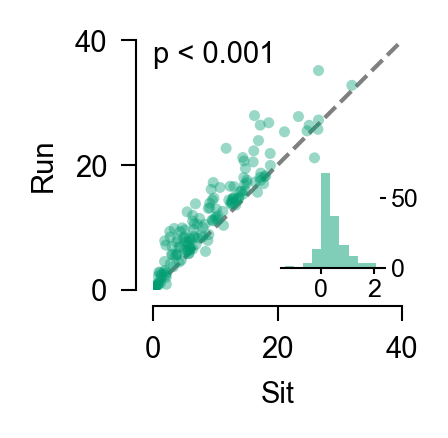

In [16]:
fig, ax = plot_fr_scatter(frs_sit, frs_run, labels=['Sit', 'Run'], title=False, inset_hist=True,
                          logscale=False, axlims=[0, 40], adjust_sp=True, pval=True, n=True,
                          facecolor=col, edgecolor='none', alpha=0.4, size=7, figsize=(3.5,3.5), dpi=300)
plt.savefig('./figs/locomotion_fr_scatter.pdf')